# Processamento Pontual

Prof. Dr. Gustavo Resque  
MSc. Tiago Araújo 

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display
from ipywidgets import *
import cv2

# Operação Pontual

In [2]:
%%latex
\begin{equation*}
  s = T(e) 
\end{equation*}

<IPython.core.display.Latex object>

In [3]:
def functionsPlot():
    fig_luz, ax = plt.subplots(1,3,figsize=(7,3), dpi = 100)
    plt.tight_layout()
    
    def update_plots(a=5, b=50):
        x = np.arange(1,500)
        p = [a*x+b, b + np.log(x)*a*100, np.power(x/(a/1.5),2) + x*(b/100)]
        ts = ['ax + b','log a','ax^2 + b']
        for i in range(3):
            ax[i].clear()
            ax[i].set_ylim(0,5000)
            ax[i].set_title(ts[i])
            ax[i].plot(x,p[i])

    def plots(a, b):
        update_plots(a,b)

    interact(plots, a=(0,10,1), b=(0,1200,100));

<IPython.core.display.Javascript object>


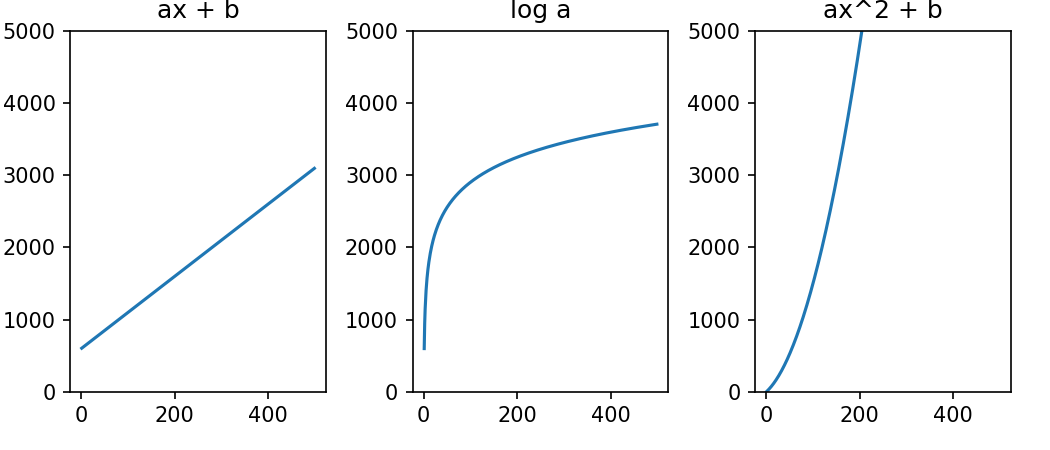

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT01LCBkZXNjcmlwdGlvbj11J2EnLCBtYXg9MTApLCBJbnRTbGlkZXIodmFsdWU9NjAwLCBkZXNjcmlwdGlvbj11J2InLCBtYXjigKY=


In [4]:
functionsPlot()

In [5]:
def negativo(path):
    fig_luz, axes = plt.subplots(1,2,figsize=(7,3), dpi = 100)
    plt.tight_layout()
    for ax in axes:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
    imagem = cv2.imread(path,0)
    negativo = 255 - imagem
    axes[0].imshow(imagem,cmap='gray')
    axes[1].imshow(negativo,cmap='gray')


<IPython.core.display.Javascript object>


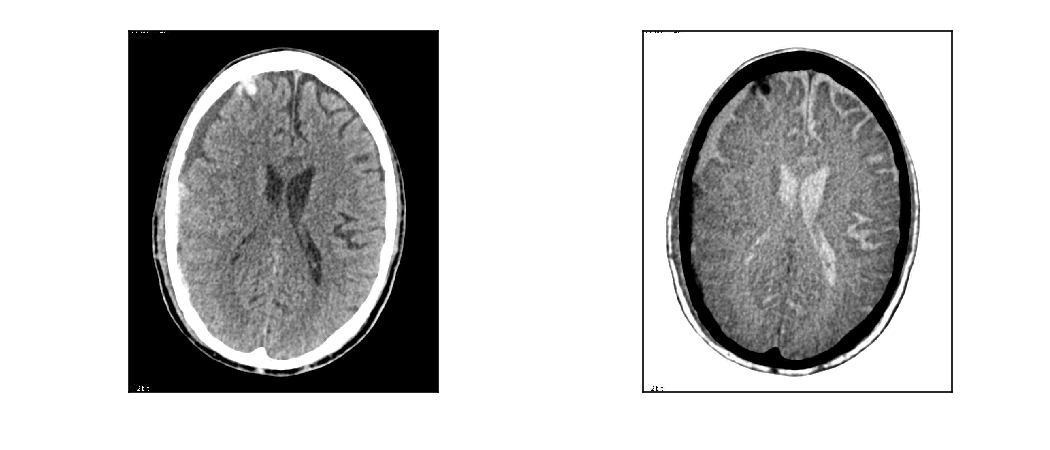

In [6]:
negativo("dataset/brain_ct.jpg")

In [7]:
def limite(im):
    im = np.where(im[:,:] < 255, im[:,:], 255)
    return np.where(im[:,:] > 0, im[:,:], 0)
    

def linearImagem(path):
    fig_luz, ax = plt.subplots(1,3,figsize=(7,3), dpi = 100)
    plt.tight_layout()
    imagem = cv2.imread(path, 0)
    
    def update_plots(a=5, b=50):
        x = np.arange(-100,500)
        p = [a*x+b, b + np.log(x)*a*100, np.power(x/(a/1.5),2) + x*(b/100)]
        ts = ['Imagem Original','Equacao','Resultado']
        linear = (a*imagem.astype(np.float64))+b
        ims = [imagem,(0,0),linear]
        for i in range(3):
            ax[i].clear()
            ax[i].set_title(ts[i])
            if (i == 1):
                ax[i].set_ylim(0,255)
                ax[i].set_xlim(0,255)

                ax[i].plot(x+b,x*a)
            else:
                ax[i].get_xaxis().set_visible(False)
                ax[i].get_yaxis().set_visible(False)
                ims[i] = limite(ims[i])
                ax[i].imshow(ims[i].astype(np.uint8), cmap='gray')

    def plots(a, b):
        update_plots(a,b)

    interact(plots, a=(0,2,.25), b=(-100,100,10));

<IPython.core.display.Javascript object>


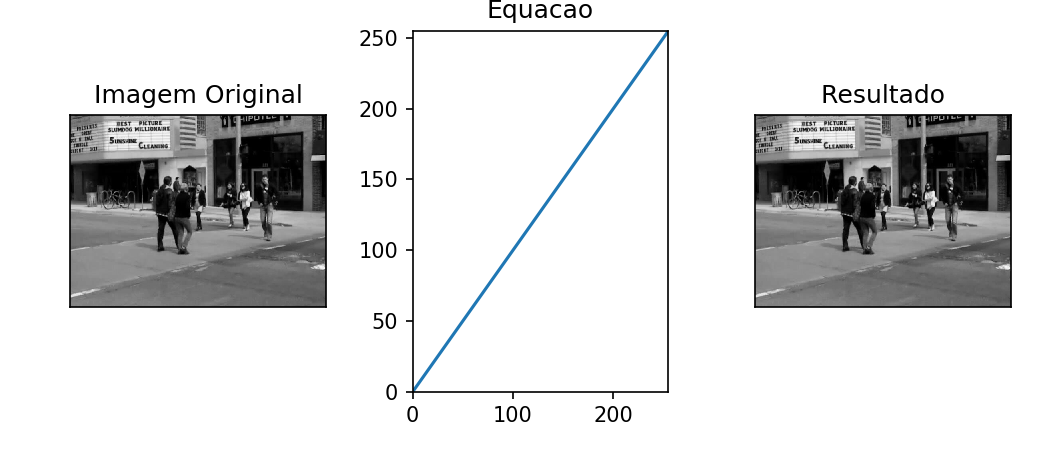

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTEuMCwgZGVzY3JpcHRpb249dSdhJywgbWF4PTIuMCwgc3RlcD0wLjI1KSwgSW50U2xpZGVyKHZhbHVlPTAsIGRlc2NyaXDigKY=


In [8]:
linearImagem("dataset/people_street.jpg")

# Contraste

\begin{equation*}
  \alpha = \dfrac{255}{min-max}  
\end{equation*}
<br/>
\begin{equation*}
  \beta = -\alpha \times min  
\end{equation*}

In [9]:
def contraste(path):
    fig_luz, ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3), dpi = 100)
    
    plt.tight_layout()
    for axis in ax:
        axis.get_xaxis().set_visible(False)
        axis.get_yaxis().set_visible(False)
    
    imagem = cv2.imread(path,0)
    minimo = np.min(imagem).astype(np.float64)
    maximo = np.max(imagem).astype(np.float64)
    
    print minimo, maximo
    
    alfa = 255/(minimo-maximo)
    beta = -alfa * minimo

    print alfa, beta
    
    imagem_contraste = maximo + (alfa * imagem.astype(np.float64) + beta)
    imagem_contraste = limite(imagem_contraste)
    
    ax[0].imshow(imagem, cmap='gray')
    ax[1].imshow(maximo - imagem_contraste.astype(np.uint8), cmap='gray')

    minimo = np.min(imagem_contraste).astype(np.float64)
    maximo = np.max(imagem_contraste).astype(np.float64)
    
    print minimo, maximo

<IPython.core.display.Javascript object>


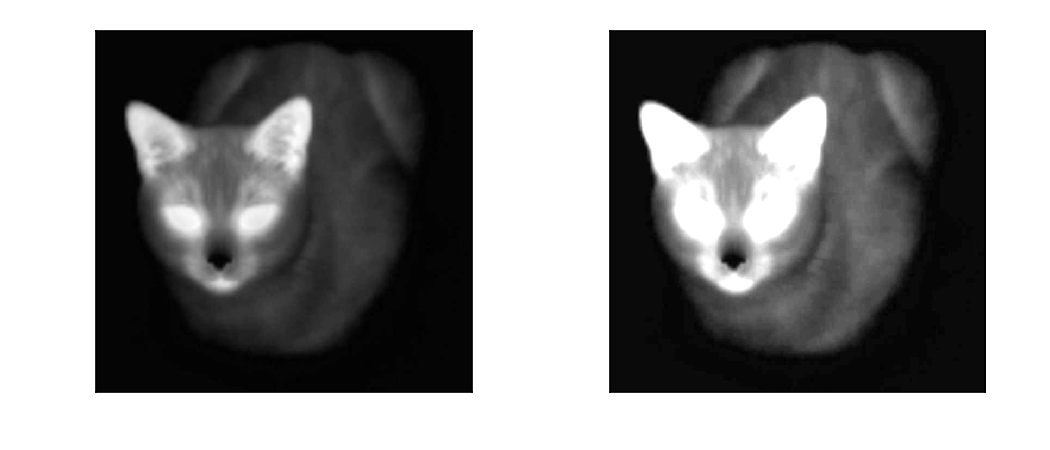

9.0 148.0
-1.8345323741007193 16.510791366906474
0.0 148.0


In [10]:
contraste("dataset/thermal_cat.jpg")

# Histograma  

In [11]:
def mostrarHistograma(path):
    fig_luz, ax = plt.subplots(1,2,figsize=(7,3), dpi = 100)
    plt.tight_layout()
    imagem = cv2.imread(path, 0)
    
    hist = cv2.calcHist([imagem],[0],None,[256],[0,255])
    
    ax[0].get_xaxis().set_visible(False)
    ax[0].get_yaxis().set_visible(False)
    ax[0].imshow(imagem,cmap='gray')
    
    ax[1].plot(np.arange(256),hist/hist.size, color='k')
    ax[1].set_yticklabels(['{:1.0f}%'.format(x) for x in ax[1].get_yticks()])
    

<IPython.core.display.Javascript object>


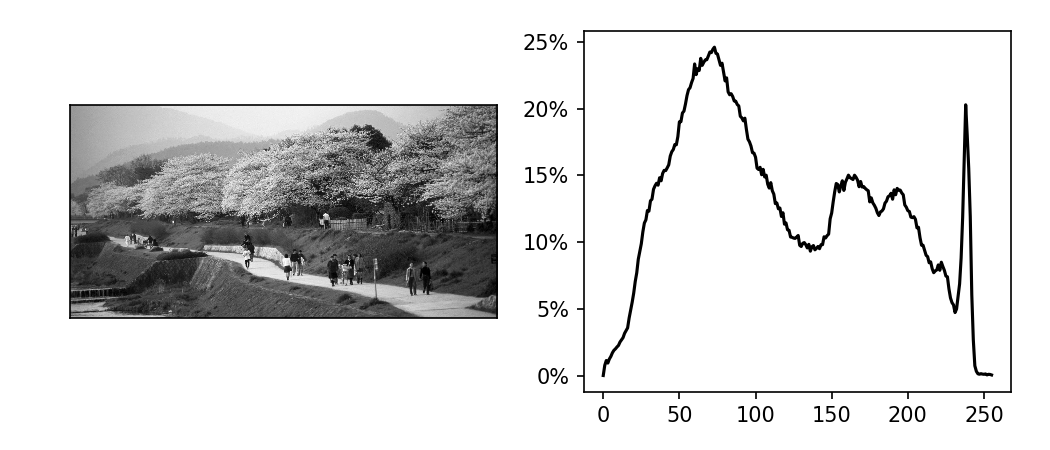

In [12]:
mostrarHistograma("dataset/kyoto.jpg")

In [13]:
def lado_ladoHistograma(path):
    fig_luz, ax = plt.subplots(2,2,figsize=(7,3), dpi = 100)
    plt.tight_layout()
    
    imagem = cv2.imread(path, 0)
    hist = cv2.calcHist([imagem],[0],None,[256],[0,256])

    ax[0][0].get_xaxis().set_visible(False)
    ax[0][0].get_yaxis().set_visible(False)
    ax[0][0].imshow(imagem,cmap='gray')

    ax[0][1].plot(np.arange(256),hist/hist.size, color='k');
    ax[0][1].set_yticklabels(['{:1.0f}%'.format(x) for x in ax[0][1].get_yticks()])

    
    def update(a,b): 
        contraste = (a*imagem.astype(np.float64))+b
        contraste = limite(contraste).astype(np.uint8)
        
        hist_const = cv2.calcHist([contraste],[0],None,[256],[0,256])
        
        ax[1][0].clear()
        ax[1][0].get_xaxis().set_visible(False)
        ax[1][0].get_yaxis().set_visible(False)
        ax[1][0].imshow(contraste, cmap='gray')
        
        ax[1][1].clear()
        #ax[1][1].set_ylim(0,7000)
        ax[1][1].plot(np.arange(256), hist_const/hist_const.size, color='k');
        ax[1][1].set_yticklabels(['{:1.0f}%'.format(x) for x in ax[1][1].get_yticks()])
        
    def plots(a, b):
        update(a, b)

    interact(plots, a=(.5,1.5,.1), b=(-50,50,10));

<IPython.core.display.Javascript object>


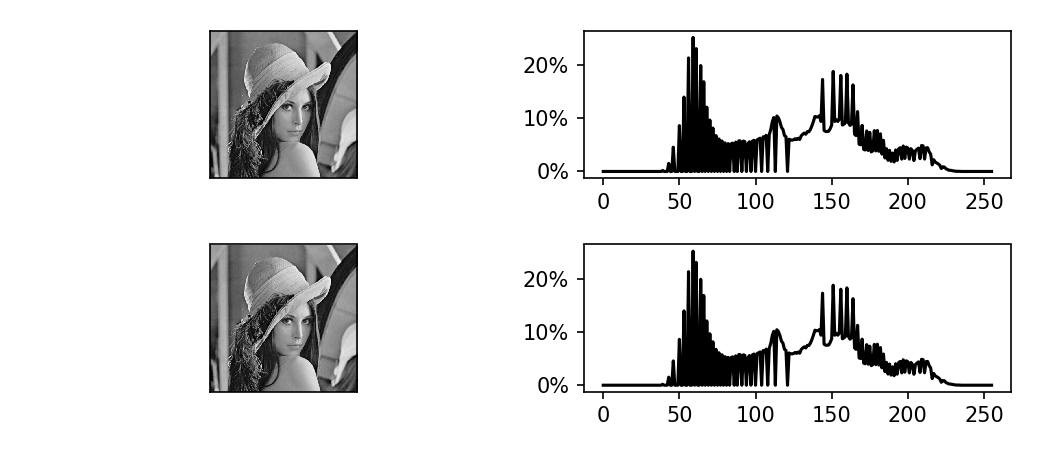

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTEuMCwgZGVzY3JpcHRpb249dSdhJywgbWF4PTEuNSwgbWluPTAuNSksIEludFNsaWRlcih2YWx1ZT0wLCBkZXNjcmlwdGnigKY=


In [14]:
lado_ladoHistograma("dataset/lenna.png")

<IPython.core.display.Javascript object>


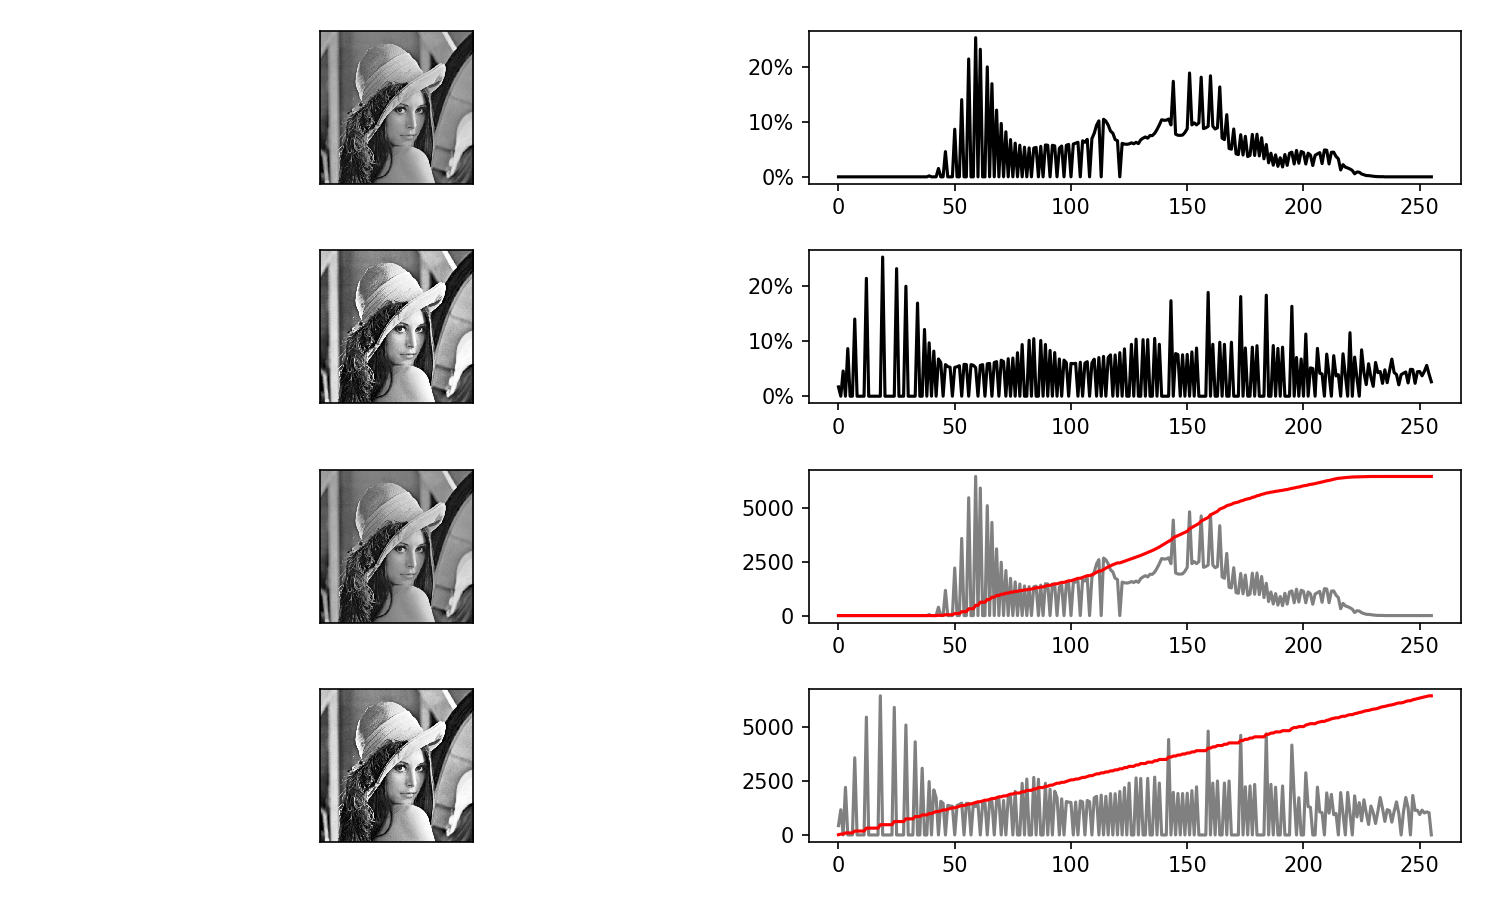

In [15]:
def EqualizacaoHistograma(path):
    fig_luz, ax = plt.subplots(4,2,figsize=(10,6), dpi = 100)
    plt.tight_layout()
    
    imagem = cv2.imread(path, 0)
    hist = cv2.calcHist([imagem],[0],None,[256],[0,256])

    ax[0][0].get_xaxis().set_visible(False)
    ax[0][0].get_yaxis().set_visible(False)
    ax[0][0].imshow(imagem,cmap='gray')
    ax[0][1].plot(np.arange(256),hist/hist.size, color='k');
    ax[0][1].set_yticklabels(['{:1.0f}%'.format(x) for x in ax[0][1].get_yticks()])

    
    equalized = cv2.equalizeHist(imagem)
    hist_equal = cv2.calcHist([equalized],[0],None,[256],[0,256])

    ax[1][0].get_xaxis().set_visible(False)
    ax[1][0].get_yaxis().set_visible(False)
    ax[1][0].imshow(equalized, cmap='gray')
    ax[1][1].plot(np.arange(256), hist_equal/hist_equal.size, color='k');
    ax[1][1].set_yticklabels(['{:1.0f}%'.format(x) for x in ax[1][1].get_yticks()])

    
    hist_manual = cv2.calcHist([imagem],[0],None,[256],[0,256])
    funcao_acumulada = hist.cumsum()
    acumulada_normalizada = funcao_acumulada * hist_manual.max()/ funcao_acumulada.max()
    
    ax[2][0].get_xaxis().set_visible(False)
    ax[2][0].get_yaxis().set_visible(False)
    ax[2][0].imshow(imagem, cmap='gray')
    ax[2][1].plot(np.arange(256), hist_manual, color = 'grey');
    ax[2][1].plot(acumulada_normalizada, color = 'r')
    
    funcao_acumulada_masked = np.ma.masked_equal(funcao_acumulada,0)
    funcao_acumulada_masked = (funcao_acumulada_masked - funcao_acumulada_masked.min())*255/(funcao_acumulada_masked.max()-funcao_acumulada_masked.min())
    funcao_acumulada_equalizada = np.ma.filled(funcao_acumulada_masked,0).astype('uint8')
    
    equalizada_man = funcao_acumulada_equalizada[imagem]
    hist_cumulativa_manual = cv2.calcHist([equalizada_man],[0],None,[256],[0,256])
    
    funcao_acumulada_man = hist_cumulativa_manual.cumsum()
    acumulada_normalizada_manual = funcao_acumulada_man * hist_manual.max()/ funcao_acumulada_man.max()
    
    ax[3][0].get_xaxis().set_visible(False)
    ax[3][0].get_yaxis().set_visible(False)
    ax[3][0].imshow(equalizada_man, cmap='gray')
    ax[3][1].plot(np.arange(256), hist_cumulativa_manual, color = 'grey');
    ax[3][1].plot(acumulada_normalizada_manual, color = 'r')

EqualizacaoHistograma('dataset/lenna.png')

# Operações Pontuais em Imagens Coloridas

<IPython.core.display.Javascript object>


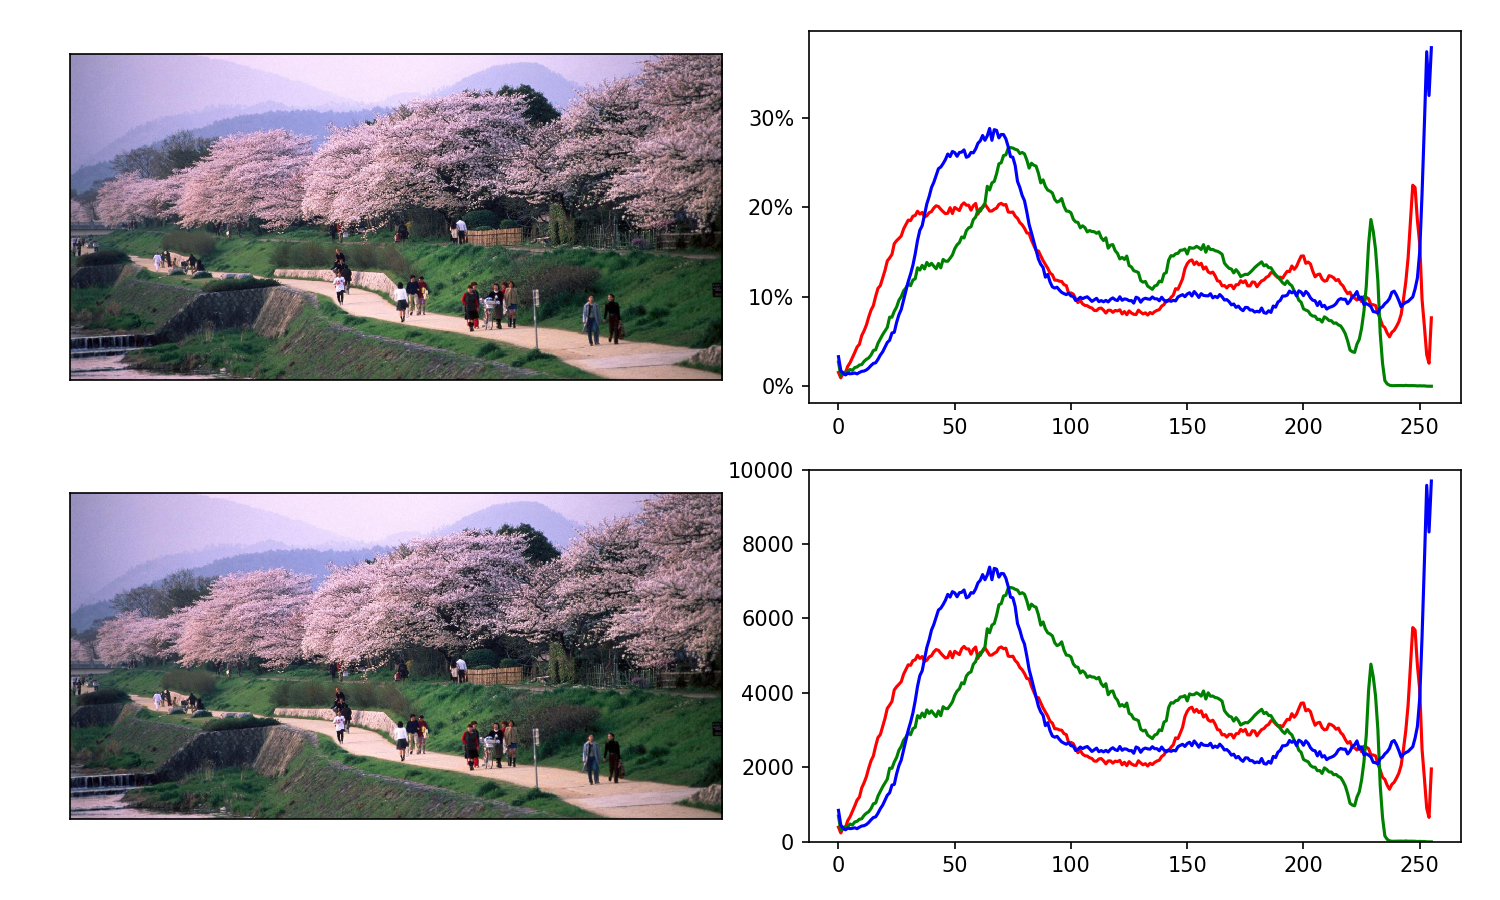

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTEuMCwgZGVzY3JpcHRpb249dSdhJywgbWF4PTEuMywgbWluPTAuNyksIEludFNsaWRlcih2YWx1ZT0wLCBkZXNjcmlwdGnigKY=


In [16]:
def colorContrasteHistograma(path):
    fig_luz, ax = plt.subplots(2,2,figsize=(10,6), dpi = 100)
    plt.tight_layout()
    
    imagem = cv2.imread(path, 1)
    hist_b = cv2.calcHist([imagem],[0],None,[256],[0,256])
    hist_g = cv2.calcHist([imagem],[1],None,[256],[0,256])
    hist_r = cv2.calcHist([imagem],[2],None,[256],[0,256])

    ax[0][0].get_xaxis().set_visible(False)
    ax[0][0].get_yaxis().set_visible(False)
    ax[0][0].imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))

    ax[0][1].plot(np.arange(256),hist_r/hist_r.size, color='r');
    ax[0][1].plot(np.arange(256),hist_g/hist_g.size, color='g');
    ax[0][1].plot(np.arange(256),hist_b/hist_b.size, color='b');
    ax[0][1].set_yticklabels(['{:1.0f}%'.format(x) for x in ax[0][1].get_yticks()])

    
    def update(a,b): 
        contraste = (a*imagem.astype(np.float64))+b
        contraste = limite(contraste).astype(np.uint8)
        
        hist_const_b = cv2.calcHist([contraste],[0],None,[256],[0,256])
        hist_const_g = cv2.calcHist([contraste],[1],None,[256],[0,256])
        hist_const_r = cv2.calcHist([contraste],[2],None,[256],[0,256])
        
        ax[1][0].clear()
        ax[1][0].get_xaxis().set_visible(False)
        ax[1][0].get_yaxis().set_visible(False)
        ax[1][0].imshow(cv2.cvtColor(contraste, cv2.COLOR_BGR2RGB))
        
        ax[1][1].clear()
        ax[1][1].set_ylim(0,10000)
        ax[1][1].plot(np.arange(256), hist_const_r, color='r');
        ax[1][1].plot(np.arange(256), hist_const_g, color='g');
        ax[1][1].plot(np.arange(256), hist_const_b, color='b');

    interact(update, a=(.7,1.3,.1), b=(-50,50,10));
    
colorContrasteHistograma('dataset/kyoto.jpg')